In [4]:
import pandas as pd
from collections import OrderedDict
from itertools import product as prd
import string

from LoadData import read_data, train_test_split
from ARTM_model import EcgClassification
from cross_validation import cross_val_score
from statsmodels.stats.weightstats import DescrStatsW
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [330]:
auc_res = pd.read_csv('auc_disease.csv', index_col=0)
logloss_res = pd.read_csv('logloss_disease.csv', index_col=0)

In [151]:
data_dir = 'ChronicCholecystitis'
n_dis = 69
n_health = 1
data_all, target = read_data(n_dis, n_health, data_dir, predictors)
X_train, y_train, X_valid, y_valid = train_test_split(data_all, predictors, target, data_dir)
tau_phi_gram3 =  np.hstack(([0] * 5, np.linspace(-1e2, -1e3, 15), [-1e3] * 5))
tau = np.hstack((
          np.repeat([1e2, 1e2 * 5], [5, 5]),
          np.repeat([1e3, 1e3 * 5], [5, 5]),
          np.repeat([1e4], [5])
          ))
n_topics = 8
n_topics_health = 2
clf = EcgClassification(data_dir, 
                        data_all.shape[0],
                        n_topics,
                        n_topics_health)
artm_scores = clf.cross_val_score(tau, tau_phi_gram3)

Splayed
8
0
1
2
3
4
5
6
7
8
9


/root/miniconda/envs/jupyterhub_py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


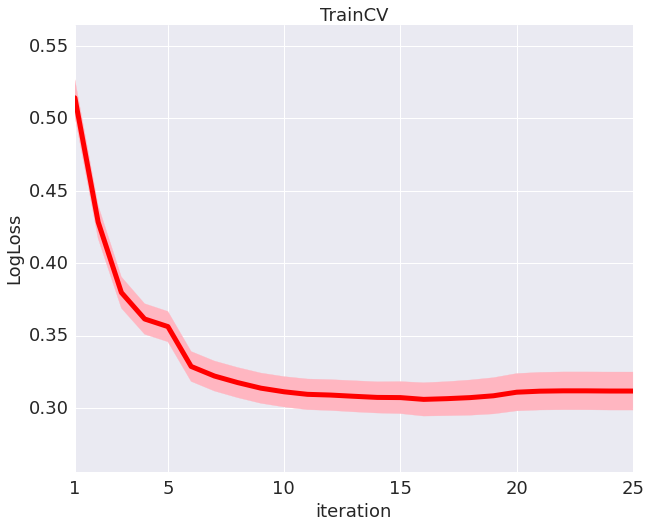

In [249]:
color = 'red'
label = 'LogLoss'

figure(figsize=(10, 8))
left_edge = []
right_edge = []
mean_res = []
iters = []

for key, value in artm_scores[1].items():
    left, right = DescrStatsW(value).tconfint_mean()
    left_edge.append(left)
    right_edge.append(right)
    iters.append(key + 1)
    mean_res.append(np.mean(value))
    
fill_between(iters, left_edge, right_edge, color='lightpink')
plot(iters, mean_res, color=color, lw=5)
    
xlabel('iteration', fontsize=18)
ylabel(label, fontsize=18)
xlim([1, len(iters)])
ylim([min(mean_res) - 0.05, max(mean_res) + 0.05])
xticks(list(xticks()[0][1:]) + [1])
tick_params(axis='both', which='major', labelsize=18)
title('TrainCV', fontsize=18)
#legend([r'$p(c|t)$', r'$p(gram3|t)$'], loc = 'best', fontsize = 15)
#savefig('{}_t{}.eps'.format(label, n_topics))
show()

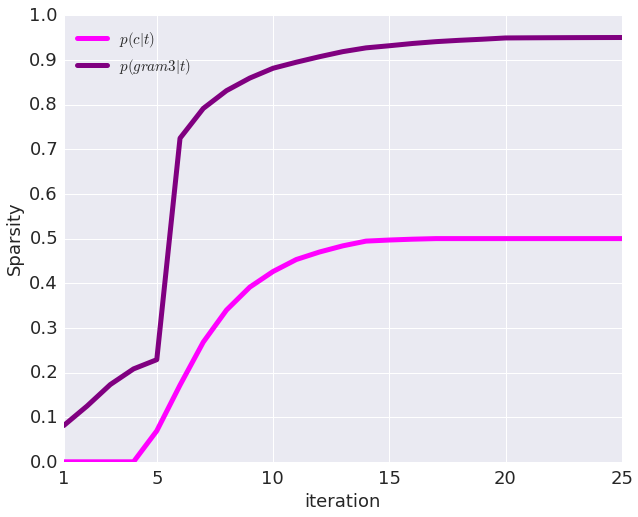

In [250]:
figure(figsize=(10, 8))
iters = []
mean_sparsity_phi_c = []
mean_sparsity_phi_gram3 = []

for key, value in artm_scores[2].items():
    iters.append(key + 1)
    mean_sparsity_phi_c.append(np.mean(value))

for key, value in artm_scores[3].items():
    mean_sparsity_phi_gram3.append(np.mean(value))

plot(iters, mean_sparsity_phi_c, color='magenta', lw=5)
plot(iters, mean_sparsity_phi_gram3, color='purple', lw=5)

xlabel('iteration', fontsize=18)
xlim([1, len(iters)])

xticks(list(xticks()[0][1:]) + [1])
yticks(np.arange(0.0, 1.1, 0.1))
tick_params(axis='both', which='major', labelsize=18)
ylabel('Sparsity', fontsize=18)
legend([r'$p(c|t)$', r'$p(gram3|t)$'], loc = 'best', fontsize = 15)
#savefig('sparsity_t8.eps')
show()

/root/miniconda/envs/jupyterhub_py3/lib/python3.4/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/root/miniconda/envs/jupyterhub_py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


Populating the interactive namespace from numpy and matplotlib


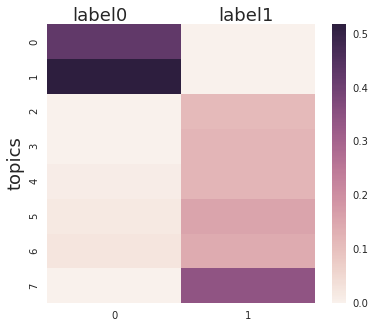

In [178]:
import seaborn as sns
figure(figsize=(6, 5))
sns.heatmap(pd.DataFrame(p_tc).as_matrix())
ylabel('topics', fontsize=18)
text(0.2, 8.1, 'label0', fontsize=18)
text(1.29, 8.1, 'label1', fontsize=18)
savefig('ptc_t8.eps', format = 'eps')
show()

/root/miniconda/envs/jupyterhub_py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


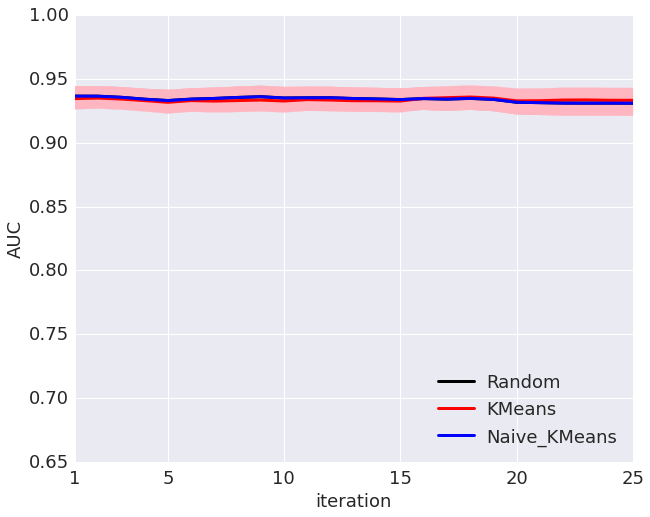

In [276]:
inits = [rand_init, kmeans_init, naive_kmeans_init, spread_init]
colors = ['black', 'red', 'blue', 'green']
fig, ax = subplots(figsize=(10,8))
for init, color in zip(inits, colors):
    left_edge = []
    right_edge = []
    mean_res = []
    iters = []

    for key, value in init.items():
        left, right = DescrStatsW(value).tconfint_mean()
        left_edge.append(left)
        right_edge.append(right)
        iters.append(key + 1)
        mean_res.append(np.mean(value))

    ax.fill_between(iters, left_edge, right_edge, color='lightpink')
    ax.plot(iters, mean_res, color=color, lw=3)
    
ax.set_xlabel('iteration', fontsize=18)
ax.set_ylabel('AUC', fontsize=18)
ax.set_xlim([1, len(iters)])
ax.set_ylim([0.65, 1])
ax.set_xticks(list(xticks()[0][1:]) + [1])
ax.tick_params(axis='both', which='major', labelsize=18)

ax.legend(['Random', 'KMeans', 'Naive_KMeans', 'Spread'], loc=4, fontsize=18)
#savefig('init_t8.eps')
show()